In [9]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
import sys
from pathlib import Path
here = Path().resolve()

# Jump one level up to …/data
data_dir = here.parent

# Point at a specific file inside …/data
csv_path = data_dir / "data/"

prod_df = pd.read_csv(csv_path/"combined_product_catalog.csv")
feature_df= pd.read_csv(csv_path/"feature_values.csv")
flowco_df=pd.read_csv(csv_path/"flow_coefficients.csv")

In [10]:
prod_df

,product_id,product_type,product_name,tier,starting_balance,current_rate,current_competitor_rate,competitor_key
0,INT0001,internal,IA,0-1M,5986986.18,2.185,4.778,EXT0001
1,INT0002,internal,IA,1-5M,8661895.28,1.202,1.202,EXT0002
2,INT0003,internal,IA,5-10M,9699128.61,3.205,3.686,EXT0003
3,INT0004,internal,IA,10M+,1834861.69,4.246,1.456,EXT0004
4,INT0005,internal,CA,0-1M,2913000.17,1.869,2.861,EXT0005
...,...,...,...,...,...,...,...,...
59,EXT0028,external,Fixed Term (12 months),10M+,NaN,1.804,NaN,NaN
60,EXT0029,external,Fixed Term (24 months),0-1M,NaN,3.350,NaN,NaN
61,EXT0030,external,Fixed Term (24 months),1-5M,NaN,4.517,NaN,NaN
62,EXT0031,external,Fixed Term (24 months),5-10M,NaN,1.931,NaN,NaN


In [11]:
flowco_df

,flow_id,from_product,to_product,dummy_coefficient_1,dummy_coefficient_2,dummy_coefficient_3,dummy_coefficient_4,dummy_coefficient_5,dummy_coefficient_6,dummy_coefficient_7,...,fixed_coefficient_1,fixed_coefficient_2,fixed_coefficient_3,fixed_coefficient_4,fixed_coefficient_5,rate,spread,intercept,standard_deviation,mean
0,1,INT0015,INT0004,0.070,5.107,4.174,2.221,1.199,3.376,9.429,...,NaN,1.818,4.859,4.812,NaN,NaN,0.327,-0.055,30786.953,29199208.94
1,2,EXT0023,INT0005,0.369,6.096,5.027,0.515,2.786,9.083,2.396,...,1.210,3.361,3.808,1.188,3.641,NaN,0.431,2.646,63719.441,54041693.72
2,3,EXT0022,INT0029,0.903,8.353,3.208,1.865,0.408,5.909,6.776,...,3.226,0.872,NaN,NaN,3.455,2.240,NaN,8.735,14614.573,34765568.75
3,4,EXT0004,INT0020,1.135,9.247,8.773,2.579,6.600,8.172,5.552,...,4.486,NaN,4.502,3.166,1.695,2.071,NaN,4.519,89813.916,88821556.00
4,5,EXT0002,INT0006,7.799,6.420,0.841,1.616,8.986,6.064,0.092,...,NaN,0.804,NaN,2.744,3.459,NaN,0.687,-5.515,71505.743,24487659.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,EXT0021,EXT0001,1.272,3.986,1.702,2.547,2.632,5.562,4.114,...,1.153,NaN,NaN,3.864,1.695,1.144,NaN,7.158,31577.229,66226685.02
496,497,INT0027,EXT0009,5.664,4.718,4.958,7.322,0.878,6.682,8.958,...,2.186,2.018,0.685,2.534,0.633,NaN,0.529,5.272,26568.171,48597830.65
497,498,EXT0015,EXT0004,9.920,6.867,8.414,4.148,7.679,0.405,1.229,...,NaN,1.731,3.273,3.547,2.931,2.108,NaN,1.541,34884.294,9303500.12
498,499,EXT0030,EXT0001,9.928,1.272,0.723,8.785,3.018,6.503,3.290,...,NaN,2.054,NaN,3.602,2.558,NaN,0.949,-9.162,50803.764,58838254.09


In [12]:
product_set = {}

for i, row in prod_df.iterrows():
    product_set[row['product_id']] = row['current_rate']


In [13]:
product_set

{'INT0001': 2.185,
 'INT0002': 1.202,
 'INT0003': 3.205,
 'INT0004': 4.246,
 'INT0005': 1.869,
 'INT0006': 3.253,
 'INT0007': 2.552,
 'INT0008': 3.166,
 'INT0009': 0.793,
 'INT0010': 1.871,
 'INT0011': 1.049,
 'INT0012': 1.665,
 'INT0013': 2.96,
 'INT0014': 4.728,
 'INT0015': 0.898,
 'INT0016': 2.249,
 'INT0017': 1.764,
 'INT0018': 0.835,
 'INT0019': 0.525,
 'INT0020': 3.971,
 'INT0021': 4.384,
 'INT0022': 1.899,
 'INT0023': 4.492,
 'INT0024': 3.924,
 'INT0025': 2.852,
 'INT0026': 0.641,
 'INT0027': 4.584,
 'INT0028': 1.53,
 'INT0029': 4.684,
 'INT0030': 4.117,
 'INT0031': 4.133,
 'INT0032': 1.526,
 'EXT0001': 3.794,
 'EXT0002': 0.761,
 'EXT0003': 0.593,
 'EXT0004': 1.318,
 'EXT0005': 2.444,
 'EXT0006': 1.815,
 'EXT0007': 1.399,
 'EXT0008': 3.234,
 'EXT0009': 4.845,
 'EXT0010': 3.579,
 'EXT0011': 0.655,
 'EXT0012': 1.903,
 'EXT0013': 4.863,
 'EXT0014': 3.191,
 'EXT0015': 0.704,
 'EXT0016': 4.229,
 'EXT0017': 1.134,
 'EXT0018': 3.975,
 'EXT0019': 3.681,
 'EXT0020': 2.113,
 'EXT0021': 1.

## UPGRADED

In [14]:
import numpy as np
import pandas as pd

def simulate_flows_better(
    product_set: dict[str, float],
    n_months: int = 240,
    start_date: str = "2005-01-31",
    seed: int = 42,
    # --- realism knobs ---
    target_elasticity: float = 1,   # average elasticity wrt dest rate (negative)
    base_flow_level: float = 30_000.0, # typical monthly flow per pair
    phi_inertia: float = 0.85,         # carryover: 0→no memory, 1→full memory
    noise_type: str = "mult",          # "mult" (recommended) or "add"
    noise_level: float = 0.01,         # ~5% multiplicative noise (or additive SD if "add")
    season_amp: float = 0.08,          # ±8% seasonal swing
    promo_lambda: float = 0.70,        # promo adstock carryover (0..1)
    # --- structural coefficients (inside 'thousands' scale; entire mean is ×1e3 at the end) ---
    c_delta: float = 6000.0,  # promo (bp) adstock
    c_rate2: float = 0.1,   # rate^2 (quadratic term)
    c_T: float = 4.5,         # log1p(T)
    c_M: float = 0.9,         # sqrt(M)
    c_gap: float = 35.0,      # dest - src (rate fraction)
    c_xgap: float = 15.0,     # dest - peer avg (rate fraction)
    c_drate: float = 8.0      # change in dest rate (fraction)
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Simulate src→dest flows with elasticity targeting, multiplicative noise,
    promo adstock, cross-price pressure, and seasonality.

    Returns
    -------
    flow_hist : DataFrame with columns:
        [date, src, dest, rate, drate, promo_bp, log1p_T, sqrt_M, gap, xgap, flow_obs]
    rate_summ : DataFrame summarizing each product's rate path.
    """
    rng = np.random.default_rng(seed)

    # 0) Build flow pairs
    rates     = product_set
    internal  = [p for p in rates if p.startswith("INT")]
    external  = [p for p in rates if p.startswith("EXT")]
    pairs     = [(i,j) for i in external for j in internal] + [(i,j) for i in internal for j in external]

    # ~500 pairs with coverage on each side
    import random
    random.seed(seed)
    base = []
    for dst in internal:
        cand = [(i, j) for (i, j) in pairs if i in external and j == dst]
        base.extend(random.sample(cand, k=min(5, len(cand))))
    for src in internal:
        cand = [(i, j) for (i, j) in pairs if i == src and j in external]
        base.extend(random.sample(cand, k=min(5, len(cand))))
    remaining = [p for p in pairs if p not in base]
    need      = max(0, 500 - len(base))
    base.extend(random.sample(remaining, k=min(need, len(remaining))))
    flow_pairs = base

    # 1) Latent baseline (kept simple; one AR(1) for level)
    phi_a, sigma_a = 0.85, 0.8
    a = np.zeros(n_months); a[0] = base_flow_level / 1e3  # expressed in 'thousands'
    for t in range(1, n_months):
        a[t] = phi_a * a[t-1] + rng.normal(0, sigma_a)

    # 2) Rates & promos
    dates = pd.date_range(start_date, periods=n_months, freq="ME")
    rate_raw_pp  = {}
    promo_bp     = pd.DataFrame(index=dates, columns=rates, dtype=float)
    promo_T      = pd.DataFrame(index=dates, columns=rates, dtype=int)
    marketing    = pd.DataFrame(index=dates, columns=rates, dtype=float)

    # Macro factor for rates (AR(1))
    sigma_macro, rho_macro = 0.060, 0.90
    z = np.zeros(n_months)
    for t in range(1, n_months):
        z[t] = rho_macro*z[t-1] + rng.normal(0, sigma_macro)
    beta_macro = {p: rng.normal(1.0, 0.3) for p in rates}

    kappa, sigma_idio = 0.10, 0.020
    floor_pp, cap_pp  = 0.0, 5.0

    for p, r0_pp in rates.items():
        r_pp = np.zeros(n_months)
        r_pp[0] = np.clip(r0_pp, floor_pp, cap_pp)
        for t in range(1, n_months):
            d_macro = z[t] - rho_macro*z[t-1]
            shock_m = beta_macro[p]*d_macro
            shock_i = rng.normal(0, sigma_idio)
            r_pp[t] = np.clip(
                r_pp[t-1] + kappa*(r0_pp - r_pp[t-1]) + shock_m + shock_i,
                floor_pp, cap_pp
            )
        rate_raw_pp[p] = r_pp

        # promos & marketing
        active = np.zeros(n_months, bool)
        length = np.zeros(n_months, int)
        idx = 0
        while idx < n_months:
            if rng.random() < 0.20:
                dur = rng.integers(2, 7)
                active[idx:idx+dur] = True
                length[idx:idx+dur] = np.arange(1, dur+1)[:max(0, n_months-idx)]
                idx += dur
            else:
                idx += 1
        promo_bp[p]  = active * rng.uniform(0.001, 0.005, n_months)  # bp → fraction after /100
        promo_T[p]   = length
        marketing[p] = rng.gamma(4, 2, n_months) * (1 + active.astype(int))

    rate_path_pp   = pd.DataFrame({p: np.round(rate_raw_pp[p], 3) for p in rates}, index=dates)
    rate_change_pp = rate_path_pp.diff().fillna(0.0)
    rate_summ = pd.DataFrame({
        "start": rate_path_pp.iloc[0],
        "end":   rate_path_pp.iloc[-1],
        "mean":  rate_path_pp.mean(),
        "std":   rate_path_pp.std(ddof=1),
        "min":   rate_path_pp.min(),
        "max":   rate_path_pp.max(),
    })

    # Precompute fractions and peer sets for xgap (cross-price pressure)
    rate_frac = {p: rate_raw_pp[p] / 100.0 for p in rates}
    peers = {
        # internal peers for internal, external peers for external
        p: ([q for q in (internal if p in internal else external) if q != p])
        for p in rates
    }

    # 3) Target average elasticity → compute rate sensitivity β_rate (inside 'thousands')
    # E_target ≈ (dY/dr) * (r_mean / Y_mean);  dY/dr ≈ -β_rate * 1e3 (since mean is scaled ×1e3)
    # → β_rate ≈ -E_target * Y_mean / (1e3 * r_mean)
    all_r = np.concatenate([rate_frac[p] for p in rates])
    r_mean = float(np.mean(all_r)) if len(all_r) else 0.03
    beta_rate = target_elasticity * base_flow_level / (1e3 * max(r_mean, 1e-6))  # >0 if E_target>0

    # 4) Promo adstock state
    promo_state = {p: 0.0 for p in rates}

    # 5) Seasonality factors per month (1 ± season_amp)
    dates = pd.date_range(start_date, periods=n_months, freq="ME")
    month_idx = np.arange(n_months)
    season = 1.0 + season_amp * np.sin(2*np.pi * (month_idx % 12) / 12.0)


    # 6) Simulate flows
    records = []
    flow_prev = {pair: base_flow_level for pair in flow_pairs}  # start near base level

    for t, dt in enumerate(dates):
        # update promo adstock (per product)
        for p in rates:
            promo_state[p] = promo_lambda * promo_state[p] + float(promo_bp.at[dt, p])

        for src, dest in flow_pairs:
            rj   = rate_frac[dest][t]
            ri   = rate_frac[src][t]
            rate_sq = rj * rj  # rate fraction squared
            gap  = rj - ri
            # cross-price pressure vs peer average (same side as dest)
            peers_d = peers[dest]
            peer_avg = np.mean([rate_frac[q][t] for q in peers_d]) if peers_d else rj
            xgap = rj - peer_avg

            drate = float(rate_change_pp.at[dt, dest]) / 100.0
            delta = promo_state[dest]                         # adstocked promo
            Tlen  = int(promo_T.at[dt, dest])
            M     = float(marketing.at[dt, dest])

            # deterministic part (in 'thousands'), then ×1e3 to get flow units
            mean_det_k = (
                a[t]                               # baseline level (thousands)
                + beta_rate * rj                   # rate sensitivity tuned to elasticity
                - c_rate2 * rate_sq               # quadratic rate term
                + c_delta * delta
                + c_T    * np.log1p(Tlen)
                + c_M    * np.sqrt(M)
                + c_gap  * gap
                + c_xgap * xgap
                + c_drate* drate
            )

            # apply seasonality multiplicatively to level
            phi_inertia = 0.1
            season = np.ones(n_months)

            mean_det = max(1.0, mean_det_k * season[t]) * 1e3  # enforce small floor

            # noise
            if noise_type == "mult":
                shock = rng.normal(0.0, noise_level)
                noisy_mean = mean_det * (1.0 + shock)
                eps = 0.0
            else:
                noisy_mean = mean_det
                eps = rng.normal(0.0, noise_level)

            # inertia blend + noise, floored at 1 to avoid zero-flows/SMAPE issues
            flow = max(1.0, (1 - phi_inertia) * noisy_mean + phi_inertia * flow_prev[(src, dest)] + eps)
            flow_prev[(src, dest)] = flow

            records.append({
                "date":     dt,
                "src":      src,
                "dest":     dest,
                "rate":     rj,
                'rate_sq':  rate_sq,
                "drate":    drate,
                "promo_bp": float(promo_bp.at[dt, dest]),
                "log1p_T":  np.log1p(Tlen),
                "sqrt_M":   np.sqrt(M),
                "gap":      gap,
                "xgap":     xgap,
                "flow_obs": flow
            })

    flow_hist = pd.DataFrame(records)
    return flow_hist, rate_summ,rate_path_pp


In [15]:

flow_hist, rate_summ,rate_path_df = simulate_flows_better(
    product_set,
    target_elasticity= 1,   # tune this per product or segment if you like
    noise_type="mult",
    noise_level=0.007,
    phi_inertia=0.1,
    season_amp=0.06,
    promo_lambda=0.7
)

In [16]:
# 1) Center rate to cut collinearity (very important)
flow_hist["rate_c"] = flow_hist["rate"] - flow_hist["rate"].mean()
flow_hist["rate_c_sq"] = flow_hist["rate_c"] ** 2
X_cols = [     # centered linear rate
    "rate_c_sq",    # centered squared rate
    "xgap",         # OR use "gap" (pick one, not both)
    "drate",
    "log1p_T",
    "sqrt_M",
    "promo_bp"
]


In [17]:
flow_hist = flow_hist.sort_values(["src", "dest", "date"])

# Add 1-month lag of flow_obs per (src, dest)
flow_hist["flow_lag1"] = (
    flow_hist
    .groupby(["src", "dest"])["flow_obs"]
    .shift(1)
)
flow_hist = flow_hist.dropna(subset=["flow_lag1"])
flow_hist["flow_lag2"] = flow_hist.groupby(["src","dest"])["flow_obs"].shift(2)

In [18]:
sub = flow_hist[(flow_hist["src"]=="EXT0001") & (flow_hist["dest"]=="INT0001")]
import statsmodels.api as sm
m = sm.OLS(sub["flow_obs"], sm.add_constant(sub[["rate","rate_sq"]])).fit()
print(m.params)


const     -1.234752e+05
rate       1.965946e+07
rate_sq   -5.103189e+08
dtype: float64


In [19]:
flow_hist

,date,src,dest,rate,rate_sq,drate,promo_bp,log1p_T,sqrt_M,gap,xgap,flow_obs,rate_c,rate_c_sq,flow_lag1,flow_lag2
898,2005-02-28,EXT0001,INT0001,0.021581,0.000466,-0.00027,0.004954,1.098612,2.539395,-0.016281,-0.004466,91165.856865,-0.004434,0.000020,68383.330239,NaN
1398,2005-03-31,EXT0001,INT0001,0.021045,0.000443,-0.00053,0.004273,1.386294,4.200821,-0.016265,-0.004504,106570.450634,-0.004970,0.000025,91165.856865,NaN
1898,2005-04-30,EXT0001,INT0001,0.021018,0.000442,-0.00003,0.003966,1.609438,3.689589,-0.016441,-0.004527,112474.493846,-0.004997,0.000025,106570.450634,91165.856865
2398,2005-05-31,EXT0001,INT0001,0.020013,0.000401,-0.00101,0.000000,0.000000,3.450810,-0.017170,-0.004548,87309.591774,-0.006002,0.000036,112474.493846,106570.450634
2898,2005-06-30,EXT0001,INT0001,0.019355,0.000375,-0.00065,0.001612,0.693147,4.603809,-0.017731,-0.004491,80336.195131,-0.006660,0.000044,87309.591774,112474.493846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117829,2024-08-31,INT0032,EXT0032,0.041380,0.001712,-0.00001,0.003184,0.693147,3.411688,0.026301,0.016813,121412.154009,0.015365,0.000236,129280.013851,124342.362750
118329,2024-09-30,INT0032,EXT0032,0.041518,0.001724,0.00014,0.004989,1.098612,4.066752,0.026004,0.016517,132477.480331,0.015503,0.000240,121412.154009,129280.013851
118829,2024-10-31,INT0032,EXT0032,0.041293,0.001705,-0.00023,0.004755,1.386294,5.301052,0.026143,0.016488,138197.547348,0.015277,0.000233,132477.480331,121412.154009
119329,2024-11-30,INT0032,EXT0032,0.042109,0.001773,0.00082,0.001599,1.609438,4.620235,0.026605,0.016627,127549.083696,0.016094,0.000259,138197.547348,132477.480331


In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

PRICE_COLS    = ["rate_c_sq", "xgap", "drate"]
CONTROL_COLS  = ["promo_bp", "log1p_T", "sqrt_M"]   # scale these if you like

def fit_pair(group, X_cols, train_frac=0.75, hac_lags=3, scale_controls=True):
    g = group.sort_values("date").copy()
    k = int(len(g) * train_frac)
    train = g.iloc[:k].copy()
    test  = g.iloc[k:].copy()

    scaler = None
    if scale_controls:
        scaler = StandardScaler()
        # Fit on TRAIN controls only
        scaler.fit(train[CONTROL_COLS])
        train.loc[:, CONTROL_COLS] = scaler.transform(train[CONTROL_COLS])
        test.loc[:, CONTROL_COLS]  = scaler.transform(test[CONTROL_COLS])

    Xtr = sm.add_constant(train[X_cols])
    ytr = train["flow_obs"].to_numpy()
    Xte = sm.add_constant(test[X_cols])
    yte = test["flow_obs"].to_numpy()

    # HAC-robust OLS
    m = sm.OLS(ytr, Xtr).fit(cov_type="HAC", cov_kwds={"maxlags": hac_lags})

    # Train & test predictions
    pred_tr = m.predict(Xtr)
    pred_te = m.predict(Xte)

    # Metrics
    wmape_tr = float(np.abs(pred_tr - ytr).sum() / (np.abs(ytr).sum() + 1e-9))
    wmape_te = float(np.abs(pred_te - yte).sum() / (np.abs(yte).sum() + 1e-9))
    r2_tr = float(1 - ((ytr - pred_tr)**2).sum() / ((ytr - ytr.mean())**2).sum())
    r2_te = float(1 - ((yte - pred_te)**2).sum() / ((yte - yte.mean())**2).sum())
    mae_te = float(np.mean(np.abs(pred_te - yte)))
    rmse_te = float(np.sqrt(np.mean((pred_te - yte)**2)))
    sigma  = float(m.resid.std(ddof=1))

    out = {
        "sigma": sigma,
        "wmape_tr": wmape_tr, "wmape_te": wmape_te,
        "r2_tr": r2_tr,       "r2_te": r2_te,
        "mae_te": mae_te,     "rmse_te": rmse_te,
    }
    # stash coefficients
    for name, val in m.params.items():
        out[name] = float(val)

    return out, m, scaler


In [21]:
flow_summ = (
    flow_hist
    .groupby(["src","dest"])["flow_obs"]
    .agg(
        total="sum",
        mean="mean",
        std="std",
        minimum="min",
        maximum="max"
    )
    .reset_index()
)

In [22]:
rows, models, scalers = [], {}, {}
for (src, dest), grp in flow_hist.groupby(["src", "dest"]):
    res, m, sc = fit_pair(grp, X_cols, train_frac=0.75, hac_lags=3, scale_controls=True)
    res.update({"src": src, "dest": dest})
    rows.append(res)
    models[(src, dest)] = m
    scalers[(src, dest)] = sc
coeff_df = pd.DataFrame(rows).sort_values(["src","dest"]).reset_index(drop=True)
coeff_df[["wmape_te","r2_te","sigma"]].describe()

,wmape_te,r2_te,sigma
count,500.000000,500.000000,500.000000
mean,0.175730,0.597198,11857.649506
std,0.050673,0.088690,829.157671
min,0.102678,0.332803,10218.457752
25%,0.135928,0.552015,11299.666297
50%,0.159000,0.613464,11869.933015
75%,0.208795,0.660136,12331.127806
max,0.322754,0.742209,13631.773154


In [23]:
coeff_df.describe()

,sigma,wmape_tr,wmape_te,r2_tr,r2_te,mae_te,rmse_te,const,rate_c_sq,xgap,drate,log1p_T,sqrt_M,promo_bp
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000
mean,11857.649506,0.156644,0.175730,0.692083,0.597198,11001.060319,13448.996851,64961.493195,-6.403936e+07,-3.407828e+05,-4.073085e+05,11940.312201,-39.244107,6124.380057
std,829.157671,0.044075,0.050673,0.026754,0.088690,1464.392619,1685.069578,50891.035373,1.641410e+08,3.575020e+06,1.988001e+06,1333.872325,996.898090,1483.522646
min,10218.457752,0.091408,0.102678,0.628935,0.332803,8152.374726,10203.694450,-63215.248590,-7.400580e+08,-1.109804e+07,-5.194243e+06,9153.265876,-2445.679543,3260.252215
25%,11299.666297,0.116317,0.135928,0.672005,0.552015,10033.959977,12470.299328,39096.686150,-9.872356e+07,-2.649334e+06,-1.546171e+06,11049.124615,-746.229073,4826.739898
50%,11869.933015,0.154358,0.159000,0.692686,0.613464,10868.857445,13316.739339,62521.496565,-5.003664e+07,-3.194106e+05,-3.355304e+05,12145.673112,-76.151994,6244.817086
75%,12331.127806,0.189522,0.208795,0.712249,0.660136,11859.213404,14518.026471,87495.573456,3.068525e+07,2.229593e+06,7.352460e+05,12956.932434,545.430698,7071.829872
max,13631.773154,0.274356,0.322754,0.760666,0.742209,15137.389014,18554.537243,220354.436938,2.867613e+08,8.946289e+06,4.523369e+06,15764.544753,2428.713315,10142.144289


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def vif(df, cols):
    X = df[cols].assign(const=1.0)
    return pd.Series({c: variance_inflation_factor(X.values, i)
                      for i, c in enumerate(X.columns) if c != "const"})
sample = flow_hist[flow_hist["src"] == "EXT0001"]
X_cols = [      # ADD THIS
    "rate_c_sq",   # centered squared term
    "xgap",        # or "gap"
    "drate",
    "promo_bp",
    "log1p_T",
    "sqrt_M",
]
vif(sample, X_cols)


rate_c_sq    3.498380
xgap         3.493890
drate        1.008287
promo_bp     2.692552
log1p_T      2.723422
sqrt_M       1.384578
dtype: float64

# Using versions

In [25]:
X_cols = ["rate_c_sq", "xgap", "drate", "promo_bp", "log1p_T", "sqrt_M"]


In [26]:
vif(sample, X_cols)


rate_c_sq    3.498380
xgap         3.493890
drate        1.008287
promo_bp     2.692552
log1p_T      2.723422
sqrt_M       1.384578
dtype: float64

In [27]:
rows, models, scalers = [], {}, {}
for (src, dest), grp in flow_hist.groupby(["src", "dest"]):
    res, m, sc = fit_pair(grp, X_cols, train_frac=0.75, hac_lags=3, scale_controls=True)
    res.update({"src": src, "dest": dest})
    rows.append(res)
    models[(src, dest)] = m
    scalers[(src, dest)] = sc

coeff_df = pd.DataFrame(rows).sort_values(["src","dest"]).reset_index(drop=True)
coeff_df[["wmape_te","r2_te","sigma"]].describe()

,wmape_te,r2_te,sigma
count,500.000000,500.000000,500.000000
mean,0.175730,0.597198,11857.649506
std,0.050673,0.088690,829.157671
min,0.102678,0.332803,10218.457752
25%,0.135928,0.552015,11299.666297
50%,0.159000,0.613464,11869.933015
75%,0.208795,0.660136,12331.127806
max,0.322754,0.742209,13631.773154


In [28]:
coeff_df

,sigma,wmape_tr,wmape_te,r2_tr,r2_te,mae_te,rmse_te,const,rate_c_sq,xgap,drate,promo_bp,log1p_T,sqrt_M,src,dest
0,12172.099477,0.157129,0.160046,0.684894,0.706651,9242.330881,11088.439906,69622.087926,1.271863e+08,2.001768e+06,-3.315180e+05,6254.710877,11872.446200,1311.148880,EXT0001,INT0001
1,10984.621142,0.101390,0.118247,0.723428,0.650608,10980.370635,13586.356420,75165.509450,-4.661288e+07,1.518377e+06,5.213369e+05,5818.903723,11981.984427,540.761104,EXT0001,INT0004
2,11283.965622,0.157585,0.192758,0.713327,0.518599,12549.144773,15339.582474,47382.666298,-4.962184e+07,-1.803959e+06,-3.530714e+06,6662.203358,12027.630221,-11.885399,EXT0001,INT0005
3,13000.824402,0.155880,0.138576,0.662957,0.625323,8751.792894,10543.634744,58199.096061,-2.693046e+07,2.885951e+06,2.406370e+06,7343.266057,11717.244091,-615.531224,EXT0001,INT0013
4,12369.851151,0.123123,0.129487,0.671914,0.696717,10841.054008,13280.975337,69950.946913,2.755575e+06,7.684798e+05,-5.283972e+05,5345.144784,13423.277764,-833.968048,EXT0001,INT0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,11038.270282,0.174463,0.201203,0.709994,0.698956,10617.005858,12898.711865,26215.491471,-1.373241e+07,-1.455128e+06,4.421004e+05,5656.547211,12141.819671,1024.957360,INT0032,EXT0015
496,10618.568535,0.114302,0.115330,0.695086,0.740463,8494.409197,10606.542503,94476.317830,-2.356996e+07,-1.322167e+06,7.750801e+04,3782.751331,13054.517334,-643.381050,INT0032,EXT0022
497,12063.933718,0.119026,0.138811,0.708538,0.548339,13031.117030,15738.884666,141586.257602,6.820345e+07,-4.904812e+06,1.164523e+06,7091.034759,11443.101622,1675.771180,INT0032,EXT0024
498,12013.381654,0.189179,0.172802,0.748359,0.742209,8923.377925,10742.251886,78427.363945,-2.613809e+08,2.439581e+06,-3.958427e+06,7856.926824,10153.614810,123.198841,INT0032,EXT0026


In [29]:
def oos_report_for_pair(group, X_cols, train_frac=0.75, hac_lags=3):
    res, m, _ = fit_pair(group, X_cols, train_frac=train_frac, hac_lags=hac_lags, scale_controls=True)
    return {
        "wmape_te": res["wmape_te"],
        "r2_te":    res["r2_te"],
        "mae_te":   res["mae_te"],
        "rmse_te":  res["rmse_te"],
        "sigma":    res["sigma"],
        "n_params": len(m.params),
        "aic":      float(m.aic),
        "bic":      float(m.bic),
    }


In [30]:
def fit_pair(group, X_cols=X_cols, train_frac=0.75, hac_lags=3, scale_controls=True):
    g = group.sort_values("date").copy()
    k = int(len(g)*train_frac)
    train, test = g.iloc[:k].copy(), g.iloc[k:].copy()

    scaler = None
    if scale_controls and CONTROL_COLS:
        scaler = StandardScaler().fit(train[CONTROL_COLS])
        train[CONTROL_COLS] = scaler.transform(train[CONTROL_COLS])
        test[CONTROL_COLS]  = scaler.transform(test[CONTROL_COLS])

    Xtr = sm.add_constant(train[X_cols]); ytr = train["flow_obs"].to_numpy()
    Xte = sm.add_constant(test[X_cols]);  yte = test["flow_obs"].to_numpy()
    m = sm.OLS(ytr, Xtr).fit(cov_type="HAC", cov_kwds={"maxlags": hac_lags})

    pred_tr, pred_te = m.predict(Xtr), m.predict(Xte)
    wmape_tr = float(np.abs(pred_tr - ytr).sum() / (np.abs(ytr).sum() + 1e-9))
    wmape_te = float(np.abs(pred_te - yte).sum() / (np.abs(yte).sum() + 1e-9))
    rmse_te  = float(np.sqrt(np.mean((pred_te - yte)**2)))
    mae_te   = float(np.mean(np.abs(pred_te - yte)))
    r2_tr    = float(1 - ((ytr - pred_tr)**2).sum() / ((ytr - ytr.mean())**2).sum())
    r2_te    = float(1 - ((yte - pred_te)**2).sum() / ((yte - yte.mean())**2).sum())
    sigma    = float(m.resid.std(ddof=1))
    r0       = float(train["rate"].mean())

    # Signal-to-noise on test (helps you define “good vs hard”)
    snr_te = float(np.std(pred_te) / (np.std(yte - pred_te) + 1e-9))

    out = {"wmape_tr":wmape_tr,"wmape_te":wmape_te,"rmse_te":rmse_te,"mae_te":mae_te,
           "r2_tr":r2_tr,"r2_te":r2_te,"sigma":sigma,"r0":r0,"snr_te":snr_te}
    out.update({k: float(v) for k,v in m.params.items()})
    return out, m, scaler, (train.index, test.index)

def fit_all_pairs(flow_hist, X_cols=X_cols, **kw):
    rows, models, scalers, splits = [], {}, {}, {}
    for (src, dest), grp in flow_hist.groupby(["src","dest"]):
        res, m, sc, split_idx = fit_pair(grp, X_cols=X_cols, **kw)
        res.update({"src":src, "dest":dest})
        rows.append(res); models[(src,dest)] = m; scalers[(src,dest)] = sc; splits[(src,dest)] = split_idx
    coeff_df = pd.DataFrame(rows).sort_values(["src","dest"]).reset_index(drop=True)
    return coeff_df, models, scalers, splits


In [31]:
new_coeff_df, models, scalers, splits = fit_all_pairs(flow_hist, X_cols=X_cols, train_frac=0.75, hac_lags=3, scale_controls=True)
new_coeff_df[["wmape_te","r2_te","sigma","snr_te"]].describe()


,wmape_te,r2_te,sigma,snr_te
count,500.000000,500.000000,500.000000,500.000000
mean,0.175730,0.597198,11857.649506,1.410140
std,0.050673,0.088690,829.157671,0.190349
min,0.102678,0.332803,10218.457752,0.999092
25%,0.135928,0.552015,11299.666297,1.275636
50%,0.159000,0.613464,11869.933015,1.397277
75%,0.208795,0.660136,12331.127806,1.545533
max,0.322754,0.742209,13631.773154,1.992254


In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def elasticity_series(model, pair_df, X_cols, D_per_date, D_default=30):
    df = pair_df.sort_values("date").copy()
    X = sm.add_constant(df[X_cols])
    q_hat = np.maximum(model.predict(X).to_numpy().astype(float), 1e-6)

    beta_rate  = float(model.params.get("rate_c", 0.0))
    beta_xgap  = float(model.params.get("xgap",   0.0))
    beta_drate = float(model.params.get("drate",  0.0))

    D_t = df["date"].map(D_per_date).fillna(D_default).to_numpy(dtype=float)
    dxgap_dr = 1.0 - 1.0 / D_t

    dQ_dr = beta_rate + beta_xgap*dxgap_dr + beta_drate*1.0
    r = df["rate"].to_numpy().astype(float)
    elas = dQ_dr * (r / q_hat)
    return pd.Series(elas, index=df.index), dQ_dr

def elasticity_summary_all(flow_hist, models, X_cols, D_per_date):
    rows = []
    for (src, dest), m in models.items():
        df = flow_hist[(flow_hist["src"]==src) & (flow_hist["dest"]==dest)]
        elas, dQ_dr = elasticity_series(m, df, X_cols=X_cols, D_per_date=D_per_date)
        rows.append({
            "src": src, "dest": dest,
            "elas_med": float(np.median(elas)),
            "elas_iqr": float(np.percentile(elas, 75) - np.percentile(elas, 25)),
            "dQdr_med": float(np.median(dQ_dr)),
        })
    return pd.DataFrame(rows)


In [33]:
new_coeff_df, models, scalers, splits = fit_all_pairs(flow_hist, X_cols=X_cols)


In [34]:
D_per_date = flow_hist.groupby("date")["dest"].nunique().to_dict()


In [35]:
elas_df = elasticity_summary_all(flow_hist, models, X_cols=X_cols, D_per_date=D_per_date)
elas_df.head()


,src,dest,elas_med,elas_iqr,dQdr_med
0,EXT0001,INT0001,0.488841,0.118888,1.638972e+06
1,EXT0001,INT0004,0.871346,0.157760,2.015989e+06
2,EXT0001,INT0005,-1.489228,0.305128,-5.306486e+06
3,EXT0001,INT0013,2.242601,0.430994,5.247228e+06
4,EXT0001,INT0020,0.109122,0.020945,2.280751e+05


In [36]:
pair_df = flow_hist[(flow_hist["src"]==src)&(flow_hist["dest"]==dest)].sort_values("date")
elas, dQ_dr = elasticity_series(models[(src,dest)], pair_df, X_cols=X_cols, D_per_date=D_per_date)


In [37]:
# central tendency
elas_med_median = elas_df["elas_med"].median()
elas_med_iqr    = elas_df["elas_med"].quantile(0.75) - elas_df["elas_med"].quantile(0.25)
share_pos_dQdr  = (elas_df["dQdr_med"] > 0).mean()

print("median(elas_med) =", elas_med_median)
print("IQR(elas_med)    =", elas_med_iqr)
print("share dQ/dr > 0  =", share_pos_dQdr)


median(elas_med) = -0.22270981616350988
IQR(elas_med)    = 1.5221888598343347
share dQ/dr > 0  = 0.414


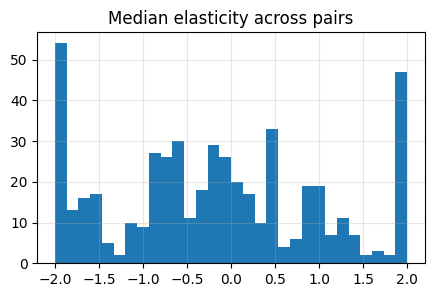

In [38]:
summary_all = new_coeff_df.merge(elas_df, on=["src","dest"])
summary_all[["wmape_te","r2_te","elas_med","elas_iqr"]].describe()

import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.hist(elas_df["elas_med"].clip(-2,2), bins=30)
plt.title("Median elasticity across pairs")
plt.grid(True, alpha=0.3)
plt.savefig("elas_median_hist.pdf")
plt.show()


In [39]:
summary_all

,wmape_tr,wmape_te,rmse_te,mae_te,r2_tr,r2_te,sigma,r0,snr_te,const,...,xgap,drate,promo_bp,log1p_T,sqrt_M,src,dest,elas_med,elas_iqr,dQdr_med
0,0.157129,0.160046,11088.439906,9242.330881,0.684894,0.706651,12172.099477,0.021837,1.617161,69622.087926,...,2.001768e+06,-3.315180e+05,6254.710877,11872.446200,1311.148880,EXT0001,INT0001,0.488841,0.118888,1.638972e+06
1,0.101390,0.118247,13586.356420,10980.370635,0.723428,0.650608,10984.621142,0.042578,1.333158,75165.509450,...,1.518377e+06,5.213369e+05,5818.903723,11981.984427,540.761104,EXT0001,INT0004,0.871346,0.157760,2.015989e+06
2,0.157585,0.192758,15339.582474,12549.144773,0.713327,0.518599,11283.965622,0.018756,1.261149,47382.666298,...,-1.803959e+06,-3.530714e+06,6662.203358,12027.630221,-11.885399,EXT0001,INT0005,-1.489228,0.305128,-5.306486e+06
3,0.155880,0.138576,10543.634744,8751.792894,0.662957,0.625323,13000.824402,0.029980,1.672986,58199.096061,...,2.885951e+06,2.406370e+06,7343.266057,11717.244091,-615.531224,EXT0001,INT0013,2.242601,0.430994,5.247228e+06
4,0.123123,0.129487,13280.975337,10841.054008,0.671914,0.696717,12369.851151,0.039764,1.326603,69950.946913,...,7.684798e+05,-5.283972e+05,5345.144784,13423.277764,-833.968048,EXT0001,INT0020,0.109122,0.020945,2.280751e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.174463,0.201203,12898.711865,10617.005858,0.709994,0.698956,11038.270282,0.007341,1.338389,26215.491471,...,-1.455128e+06,4.421004e+05,5656.547211,12141.819671,1024.957360,INT0032,EXT0015,-0.111385,0.042987,-9.902911e+05
496,0.114302,0.115330,10606.542503,8494.409197,0.695086,0.740463,10618.568535,0.037787,1.626753,94476.317830,...,-1.322167e+06,7.750801e+04,3782.751331,13054.517334,-643.381050,INT0032,EXT0022,-0.615255,0.105411,-1.224000e+06
497,0.119026,0.138811,15738.884666,13031.117030,0.708538,0.548339,12063.933718,0.039948,1.339683,141586.257602,...,-4.904812e+06,1.164523e+06,7091.034759,11443.101622,1675.771180,INT0032,EXT0024,-1.516708,0.267979,-3.663651e+06
498,0.189179,0.172802,10742.251886,8923.377925,0.748359,0.742209,12013.381654,0.019302,1.992254,78427.363945,...,2.439581e+06,-3.958427e+06,7856.926824,10153.614810,123.198841,INT0032,EXT0026,-0.563119,0.128180,-1.556965e+06


In [40]:
###old one
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from sklearn.preprocessing import StandardScaler

# PRICE_COLS   = ["rate_c","xgap","drate"]
# CONTROL_COLS = ["promo_bp","log1p_T","sqrt_M"]
# X_COLS       = PRICE_COLS + CONTROL_COLS

# def fit_pair(group, X_cols=X_COLS, train_frac=0.75, hac_lags=3, scale_controls=True):
#     g = group.sort_values("date").copy()
#     k = int(len(g)*train_frac)
#     train, test = g.iloc[:k].copy(), g.iloc[k:].copy()

#     scaler = None
#     if scale_controls and CONTROL_COLS:
#         scaler = StandardScaler().fit(train[CONTROL_COLS])
#         train[CONTROL_COLS] = scaler.transform(train[CONTROL_COLS])
#         test[CONTROL_COLS]  = scaler.transform(test[CONTROL_COLS])

#     Xtr = sm.add_constant(train[X_cols]); ytr = train["flow_obs"].to_numpy()
#     Xte = sm.add_constant(test[X_cols]);  yte = test["flow_obs"].to_numpy()
#     m = sm.OLS(ytr, Xtr).fit(cov_type="HAC", cov_kwds={"maxlags": hac_lags})

#     pred_tr, pred_te = m.predict(Xtr), m.predict(Xte)
#     wmape_tr = float(np.abs(pred_tr - ytr).sum() / (np.abs(ytr).sum() + 1e-9))
#     wmape_te = float(np.abs(pred_te - yte).sum() / (np.abs(yte).sum() + 1e-9))
#     rmse_te  = float(np.sqrt(np.mean((pred_te - yte)**2)))
#     mae_te   = float(np.mean(np.abs(pred_te - yte)))
#     r2_tr    = float(1 - ((ytr - pred_tr)**2).sum() / ((ytr - ytr.mean())**2).sum())
#     r2_te    = float(1 - ((yte - pred_te)**2).sum() / ((yte - yte.mean())**2).sum())
#     sigma    = float(m.resid.std(ddof=1))
#     r0       = float(train["rate"].mean())

#     out = {"wmape_tr":wmape_tr,"wmape_te":wmape_te,"rmse_te":rmse_te,"mae_te":mae_te,
#            "r2_tr":r2_tr,"r2_te":r2_te,"sigma":sigma,"r0":r0}
#     out.update({k: float(v) for k,v in m.params.items()})
#     return out, m, scaler, (train.index, test.index)

# # ---------- Plot helpers ----------
def plot_pair_timeseries(pair_df, title="Pair rates & flows"):
    df = pair_df.sort_values("date")
    fig, ax1 = plt.subplots(figsize=(10,4))
    ax2 = ax1.twinx()
    ax1.plot(df["date"], df["rate"], lw=1.5)
    ax1.set_ylabel("Rate")
    ax2.plot(df["date"], df["flow_obs"], lw=1.0, alpha=0.8)
    ax2.set_ylabel("Flow")
    ax1.set_title(title)
    ax1.grid(True, alpha=0.3)
    plt.tight_layout()

def plot_pred_vs_actual(pair_df, model, X_cols=X_cols, train_idx=None, title="Predicted vs Actual (test)"):
    df = pair_df.sort_values("date")
    test = df.loc[train_idx[1]] if train_idx else df
    Xte = sm.add_constant(test[X_cols]); yte = test["flow_obs"].to_numpy()
    pred = model.predict(Xte)
    fig, ax = plt.subplots(figsize=(4.5,4.5))
    ax.scatter(yte, pred, s=8, alpha=0.6)
    lims = [min(yte.min(), pred.min()), max(yte.max(), pred.max())]
    ax.plot(lims, lims, 'k--', lw=1)
    ax.set_xlabel("Actual"); ax.set_ylabel("Predicted"); ax.set_title(title)
    ax.grid(True, alpha=0.3); plt.tight_layout()

def plot_metric_hists(coeff_df):
    fig, axes = plt.subplots(1,2,figsize=(9,3.5))
    axes[0].hist(coeff_df["wmape_te"], bins=30)
    axes[0].set_title("WMAPE (test)"); axes[0].set_xlabel("WMAPE"); axes[0].grid(True, alpha=0.3)
    axes[1].hist(coeff_df["r2_te"], bins=30)
    axes[1].set_title("R² (test)"); axes[1].set_xlabel("R²"); axes[1].grid(True, alpha=0.3)
    plt.tight_layout()

def plot_residual_diag(pair_df, model, X_cols=X_cols, train_idx=None):
    df = pair_df.sort_values("date")
    test = df.loc[train_idx[1]] if train_idx else df
    Xte = sm.add_constant(test[X_cols]); yte = test["flow_obs"].to_numpy()
    pred = model.predict(Xte); resid = yte - pred
    fig, axes = plt.subplots(1,2,figsize=(9,3.5))
    axes[0].hist(resid, bins=30)
    axes[0].set_title("Residuals (test)"); axes[0].grid(True, alpha=0.3)
    axes[1].scatter(pred, resid, s=8, alpha=0.6)
    axes[1].axhline(0, color='k', lw=1)
    axes[1].set_xlabel("Fitted"); axes[1].set_title("Residual vs Fitted (test)")
    axes[1].grid(True, alpha=0.3); plt.tight_layout()

def compute_elasticity_series(pair_df, params, r0):
    def _elas(row):
        r = float(row["rate"]); q = max(float(row["flow_obs"]), 1e-6)
        dY_dr = params.get("rate_c",0.0) + params.get("xgap",0.0) + params.get("drate",0.0)
        return dY_dr * (r / q)
    s = pair_df.sort_values("date").apply(_elas, axis=1)
    return s

def plot_elasticity(pair_df, params, r0, title="Local price elasticity"):
    elas = compute_elasticity_series(pair_df, params, r0)
    fig, ax = plt.subplots(figsize=(10,3.5))
    ax.plot(pair_df.sort_values("date")["date"], elas.values, lw=1.2)
    ax.axhline(np.median(elas), color='k', ls='--', lw=1)
    ax.set_title(title); ax.set_ylabel("Elasticity"); ax.grid(True, alpha=0.3); plt.tight_layout()

# ---------- Simulation scaffold ----------
class ScenarioSet:
    """Residual-shock scenarios per (src,dest). Diagonal covariance by default."""
    def __init__(self, coeff_df, S=1000, seed=42):
        self.S = int(S); self.rng = np.random.default_rng(seed)
        self.sigmas = {(row["src"],row["dest"]): float(row["sigma"]) for _,row in coeff_df.iterrows()}
    def draw(self, pair_key, T_len):
        sigma = self.sigmas[pair_key]
        return self.rng.normal(0.0, sigma, size=(self.S, T_len))

def simulate_pair_flows(pair_df, model, X_cols=X_cols, scen: ScenarioSet=None):
    """Return fitted flows and simulated flows: dict with 'fitted' (T,), 'sim' (S,T)."""
    df = pair_df.sort_values("date")
    X = sm.add_constant(df[X_cols]); fitted = model.predict(X).astype(float)
    if scen is None:
        return {"fitted": fitted, "sim": None}
    shocks = scen.draw((df["src"].iloc[0], df["dest"].iloc[0]), T_len=len(df))
    sim = fitted[None,:] + shocks
    return {"fitted": fitted, "sim": sim}

def plot_sim_variance_check(fitted, sim):
    """Compare fitted variance vs simulated variance."""
    if sim is None: 
        print("No scenarios provided."); return
    sim_var = sim.var(axis=1).mean()
    fig, ax = plt.subplots(figsize=(5,3))
    ax.bar(["fitted var","avg sim var"], [np.var(fitted), sim_var])
    ax.set_title("Variance check"); ax.grid(True, alpha=0.3); plt.tight_layout()


In [41]:
from collections import OrderedDict
import numpy as np
import pandas as pd

def pick_deep_dive_pairs(coeff_df: pd.DataFrame, flow_hist: pd.DataFrame):
    """
    Returns an ordered list of up to 5 (src, dest) pairs:
    - 'good'   ~ 10th pct WMAPE
    - 'median' ~ 50th pct WMAPE
    - 'hard'   ~ 90th pct WMAPE
    - 'internal' dest (median WMAPE among dest starting with 'INT')
    - 'external' dest (median WMAPE among dest starting with 'EXT')
    Falls back to src prefixes if dest prefixes are unavailable.
    """
    pairs = OrderedDict()

    # percentiles
    for label, q in [("good", 0.10), ("median", 0.50), ("hard", 0.90)]:
        target = coeff_df["wmape_te"].quantile(q)
        row = coeff_df.iloc[(coeff_df["wmape_te"] - target).abs().argmin()]
        pairs[label] = (row["src"], row["dest"])

    def _pick_by_prefix(prefix, on="dest"):
        df = coeff_df.copy()
        if on == "dest":
            mask = df["dest"].astype(str).str.startswith(prefix)
        else:
            mask = df["src"].astype(str).str.startswith(prefix)
        cand = df[mask]
        if cand.empty:
            return None
        target = cand["wmape_te"].quantile(0.50)
        row = cand.iloc[(cand["wmape_te"] - target).abs().argmin()]
        return (row["src"], row["dest"])

    # internal/external by DEST first; fallback to SRC if needed
    # internal = _pick_by_prefix("INT", on="dest") or _pick_by_prefix("INT", on="src")
    # external = _pick_by_prefix("EXT", on="dest") or _pick_by_prefix("EXT", on="src")

    # if internal: pairs["internal"] = internal
    # if external: pairs["external"] = external

    # de-duplicate while preserving order; limit to 5
    uniq = []
    seen = set()
    for k, v in pairs.items():
        if v not in seen:
            uniq.append((k, v))
            seen.add(v)
        if len(uniq) == 5:
            break
    return uniq  # list of (label, (src,dest))


In [42]:
deep_pairs = pick_deep_dive_pairs(coeff_df, flow_hist)
deep_pairs


[('good', ('EXT0001', 'INT0030')),
 ('median', ('INT0004', 'EXT0012')),
 ('hard', ('INT0002', 'EXT0017'))]

In [43]:
import statsmodels.api as sm

def fit_pairs_and_cache(flow_hist, deep_pairs, X_cols=X_cols):
    models = {}
    splits = {}
    res_rows = []
    for label, (src, dest) in deep_pairs:
        pair_df = flow_hist[(flow_hist["src"]==src) & (flow_hist["dest"]==dest)].sort_values("date")
        res, model, scaler, split_idx = fit_pair(pair_df, X_cols=X_cols)
        models[(src, dest)] = model
        splits[(src, dest)] = split_idx
        row = {"label":label, "src":src, "dest":dest}
        row.update(res)
        res_rows.append(row)
    return models, splits, pd.DataFrame(res_rows)

models_by_pair, splits_by_pair, deep_metrics = fit_pairs_and_cache(flow_hist, deep_pairs, X_cols=X_cols)
deep_metrics[["label","src","dest","wmape_te","r2_te","rmse_te","mae_te"]]



,label,src,dest,wmape_te,r2_te,rmse_te,mae_te
0,good,EXT0001,INT0030,0.116011,0.614033,10943.827204,9134.989505
1,median,INT0004,EXT0012,0.159253,0.620702,12824.520087,11080.354440
2,hard,INT0002,EXT0017,0.240830,0.450717,16318.731050,13080.048943


In [44]:
splits_by_pair

{('EXT0001',
  'INT0030'): (Index([  648,  1148,  1648,  2148,  2648,  3148,  3648,  4148,  4648,  5148,
         ...
         85148, 85648, 86148, 86648, 87148, 87648, 88148, 88648, 89148, 89648],
        dtype='int64', length=179), Index([ 90148,  90648,  91148,  91648,  92148,  92648,  93148,  93648,  94148,
          94648,  95148,  95648,  96148,  96648,  97148,  97648,  98148,  98648,
          99148,  99648, 100148, 100648, 101148, 101648, 102148, 102648, 103148,
         103648, 104148, 104648, 105148, 105648, 106148, 106648, 107148, 107648,
         108148, 108648, 109148, 109648, 110148, 110648, 111148, 111648, 112148,
         112648, 113148, 113648, 114148, 114648, 115148, 115648, 116148, 116648,
         117148, 117648, 118148, 118648, 119148, 119648],
        dtype='int64')),
 ('INT0004',
  'EXT0012'): (Index([  679,  1179,  1679,  2179,  2679,  3179,  3679,  4179,  4679,  5179,
         ...
         85179, 85679, 86179, 86679, 87179, 87679, 88179, 88679, 89179, 89679],
 

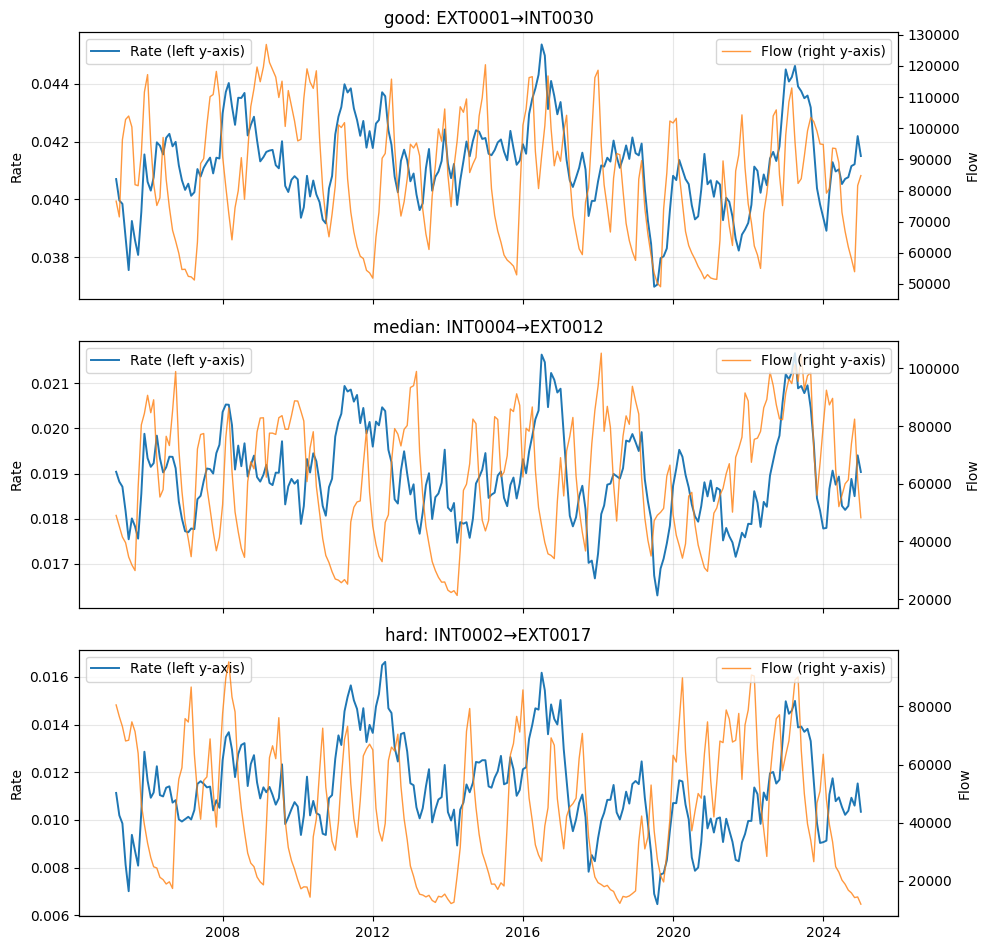

In [48]:
import matplotlib.pyplot as plt

def plot_timeseries_multi(flow_hist, deep_pairs, splits_by_pair, save_pdf=True, pdf_path="timeseries_multi.pdf"):
    n = len(deep_pairs)
    fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, 3.2*n), sharex=True)
    if n == 1: axes = [axes]
    for ax, (label, (src, dest)) in zip(axes, deep_pairs):
        df = flow_hist[(flow_hist["src"]==src) & (flow_hist["dest"]==dest)].sort_values("date")
        # mark train/test split
        tr_idx, te_idx = splits_by_pair[(src, dest)]
        test_start = df.loc[te_idx, "date"].min()
        ax2 = ax.twinx()
        ax.plot(df["date"], df["rate"], lw=1.4, color="C0", label="Rate (left y-axis)")
        ax2.plot(df["date"], df["flow_obs"], lw=1.0, alpha=0.8, color="C1", label="Flow (right y-axis)")
        # ax.axvline(test_start, color="k", ls="--", lw=1)
        # ax.plot([], [], color="C0", label="Rate (left y-axis)")
        # ax2.plot([], [], color="C1", label="Flow (right y-axis)")
        ax.legend(loc="upper left")
        ax2.legend(loc="upper right")
        ax.set_ylabel("Rate"); ax2.set_ylabel("Flow")
        ax.set_title(f"{label}: {src}→{dest}")
        ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.xlabel("Date")
    plt.savefig('flows.pdf')
plot_timeseries_multi(flow_hist, deep_pairs, splits_by_pair)


In [46]:
coeff_df.to_csv('ridge_coefficients.csv')
flow_hist.to_csv('flow_hist.csv', index=False)
flow_summ.to_csv("flow_summ.csv", index=False)
rate_summ.to_csv('rate_summary.csv')


In [47]:
def plot_pred_vs_actual_multi(flow_hist, deep_pairs, models_by_pair, splits_by_pair, X_cols=X_COLS):
    n = len(deep_pairs)
    fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(4.8, 4.6*n))
    if n == 1: axes = [axes]
    for ax, (label, (src, dest)) in zip(axes, deep_pairs):
        df  = flow_hist[(flow_hist["src"]==src) & (flow_hist["dest"]==dest)].sort_values("date")
        m   = models_by_pair[(src, dest)]
        tr_idx, te_idx = splits_by_pair[(src, dest)]
        test = df.loc[te_idx]
        Xte  = sm.add_constant(test[X_cols]); yte = test["flow_obs"].to_numpy()
        pred = m.predict(Xte)
        ax.scatter(yte, pred, s=8, alpha=0.6)
        lims = [min(yte.min(), pred.min()), max(yte.max(), pred.max())]
        ax.plot(lims, lims, 'k--', lw=1)
        mae = np.mean(np.abs(pred - yte)); rmse = np.sqrt(np.mean((pred - yte)**2))
        ax.set_title(f"{label}: {src}→{dest} (MAE={mae:,.0f}, RMSE={rmse:,.0f})")
        ax.set_xlabel("Actual"); ax.set_ylabel("Predicted"); ax.grid(True, alpha=0.3)
    plt.tight_layout()

plot_pred_vs_actual_multi(flow_hist, deep_pairs, models_by_pair, splits_by_pair)


NameError: name 'X_COLS' is not defined

In [ ]:
def plot_residual_diag_multi(flow_hist, deep_pairs, models_by_pair, splits_by_pair, X_cols=X_COLS):
    n = len(deep_pairs)
    fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(10, 3.4*n), squeeze=False)
    for r, (label, (src, dest)) in enumerate(deep_pairs):
        df  = flow_hist[(flow_hist["src"]==src) & (flow_hist["dest"]==dest)].sort_values("date")
        m   = models_by_pair[(src, dest)]
        tr_idx, te_idx = splits_by_pair[(src, dest)]
        test = df.loc[te_idx]
        Xte  = sm.add_constant(test[X_cols]); yte = test["flow_obs"].to_numpy()
        pred = m.predict(Xte); resid = yte - pred
        # Residual histogram
        ax0 = axes[r,0]; ax0.hist(resid, bins=30)
        ax0.set_title(f"{label}: Residuals (test)"); ax0.grid(True, alpha=0.3)
        # Residual vs Fitted
        ax1 = axes[r,1]; ax1.scatter(pred, resid, s=8, alpha=0.6)
        ax1.axhline(0, color='k', lw=1); ax1.set_xlabel("Fitted"); ax1.set_ylabel("Residual")
        ax1.set_title(f"{label}: Residual vs Fitted"); ax1.grid(True, alpha=0.3)
    plt.tight_layout()

plot_residual_diag_multi(flow_hist, deep_pairs, models_by_pair, splits_by_pair)


NameError: name 'X_COLS' is not defined

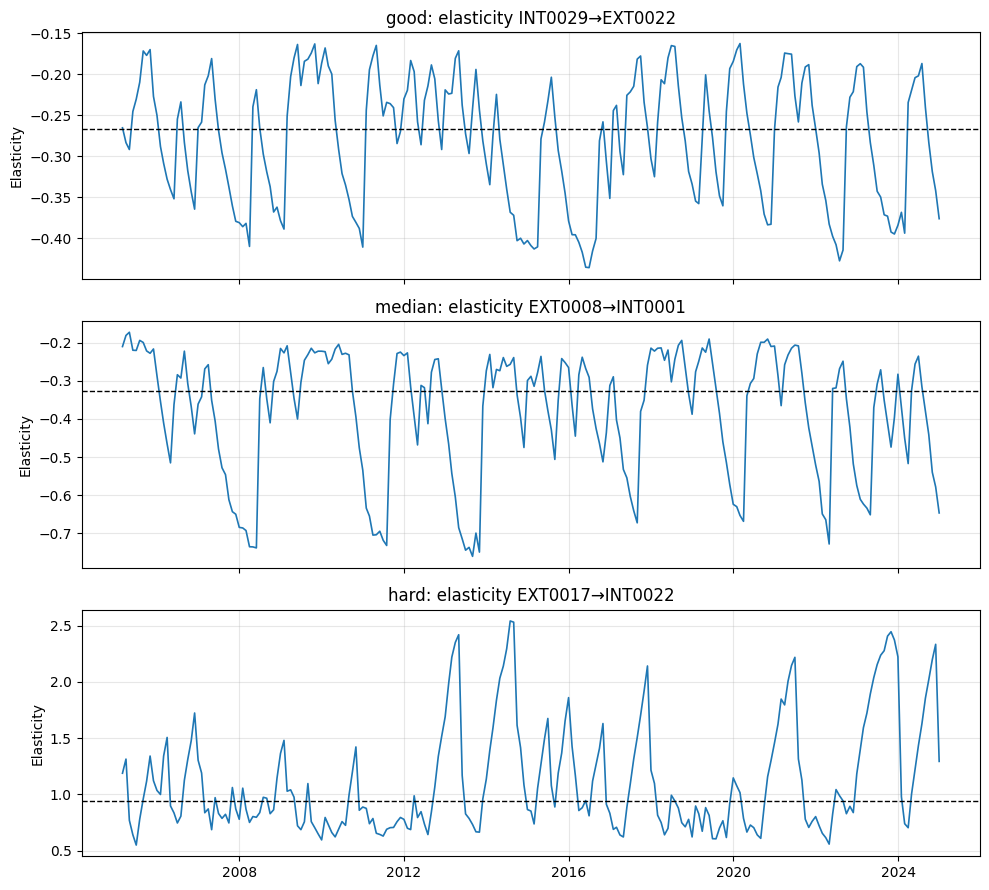

In [ ]:
def plot_elasticity_multi(flow_hist, deep_pairs, models_by_pair):
    n = len(deep_pairs)
    fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, 3.0*n), sharex=True)
    if n == 1: axes = [axes]
    for ax, (label, (src, dest)) in zip(axes, deep_pairs):
        df  = flow_hist[(flow_hist["src"]==src) & (flow_hist["dest"]==dest)].sort_values("date")
        m   = models_by_pair[(src, dest)]
        params = {k: v for k, v in m.params.items()}
        r0 = df.iloc[: int(len(df)*0.75) ]["rate"].mean()  # training mean for centering
        # compute elasticity series
        r = df["rate"].to_numpy().astype(float)
        q = np.maximum(df["flow_obs"].to_numpy().astype(float), 1e-6)
        dY_dr = params.get("rate_c",0.0) + params.get("xgap",0.0) + params.get("drate",0.0)
        elas = dY_dr * (r / q)
        ax.plot(df["date"], elas, lw=1.2)
        ax.axhline(np.median(elas), color='k', ls='--', lw=1)
        ax.set_title(f"{label}: elasticity {src}→{dest}"); ax.set_ylabel("Elasticity"); ax.grid(True, alpha=0.3)
    plt.tight_layout()

plot_elasticity_multi(flow_hist, deep_pairs, models_by_pair)


In [ ]:
def plot_sim_variance_check_multi(flow_hist, deep_pairs, models_by_pair, coeff_df, X_cols=X_COLS, S=1000, seed=42):
    scen = ScenarioSet(coeff_df, S=S, seed=seed)
    n = len(deep_pairs)
    fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(6, 2.8*n))
    if n == 1: axes = [axes]
    for ax, (label, (src, dest)) in zip(axes, deep_pairs):
        df  = flow_hist[(flow_hist["src"]==src) & (flow_hist["dest"]==dest)].sort_values("date")
        m   = models_by_pair[(src, dest)]
        X   = sm.add_constant(df[X_cols])
        fitted = m.predict(X).astype(float)
        shocks = scen.draw((src, dest), T_len=len(df))
        sim_var = shocks.var(axis=1).mean() + np.var(fitted)  # variance of (fitted + shocks)
        ax.bar(["fitted var","avg sim var"], [np.var(fitted), sim_var])
        ax.set_title(f"{label}: variance check {src}→{dest}"); ax.grid(True, alpha=0.3)
    plt.tight_layout()

plot_sim_variance_check_multi(flow_hist, deep_pairs, models_by_pair, coeff_df, S=1000)


NameError: name 'X_COLS' is not defined

In [ ]:
flow_hist

,date,src,dest,rate,rate_sq,drate,promo_bp,log1p_T,sqrt_M,gap,xgap,flow_obs,rate_c,rate_c_sq,flow_lag1,flow_lag2
898,2005-02-28,EXT0001,INT0001,0.021581,0.000466,-0.397351,2.033968,0.697986,-0.750862,-0.016281,-0.327892,93697.294933,-0.004434,-1.091841,72648.192658,NaN
1398,2005-03-31,EXT0001,INT0001,0.021045,0.000443,-0.781097,1.633856,1.119062,0.861345,-0.016265,-0.330611,108282.117234,-0.004970,-1.059092,93697.294933,NaN
1898,2005-04-30,EXT0001,INT0001,0.021018,0.000442,-0.043123,1.453665,1.445675,0.365258,-0.016441,-0.332233,113130.543000,-0.004997,-1.057353,108282.117234,93697.294933
2398,2005-05-31,EXT0001,INT0001,0.020013,0.000401,-1.489552,-0.876144,-0.910038,0.133552,-0.017170,-0.333782,84513.531826,-0.006002,-0.985524,113130.543000,108282.117234
2898,2005-06-30,EXT0001,INT0001,0.019355,0.000375,-0.958211,0.070420,0.104512,1.252395,-0.017731,-0.329708,79561.410325,-0.006660,-0.931441,84513.531826,113130.543000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117829,2024-08-31,INT0032,EXT0032,0.041380,0.001712,-0.013605,0.994132,0.104512,0.095589,0.026301,1.183141,120538.116120,0.015365,0.313999,129828.813077,125950.683812
118329,2024-09-30,INT0032,EXT0032,0.041518,0.001724,0.207788,2.054538,0.697986,0.731247,0.026004,1.162125,133707.132777,0.015503,0.341708,120538.116120,129828.813077
118829,2024-10-31,INT0032,EXT0032,0.041293,0.001705,-0.338313,1.916813,1.119062,1.928982,0.026143,1.160038,138833.279198,0.015277,0.296561,133707.132777,120538.116120
119329,2024-11-30,INT0032,EXT0032,0.042109,0.001773,1.211432,0.063004,1.445675,1.268334,0.026605,1.169950,126366.097974,0.016094,0.463004,138833.279198,133707.132777


In [ ]:
flow_summ

,src,dest,total,mean,std,minimum,maximum
0,EXT0001,INT0001,1.470698e+07,61535.472484,21912.162686,26021.788025,113130.543000
1,EXT0001,INT0004,2.127349e+07,89010.400136,21902.856657,49800.823985,137915.353407
2,EXT0001,INT0005,1.442378e+07,60350.536675,21905.530283,21337.935770,102898.455965
3,EXT0001,INT0013,1.606793e+07,67229.849206,21713.158931,31276.186967,116919.774492
4,EXT0001,INT0020,1.955140e+07,81805.037919,22648.892181,47662.885367,135255.115802
...,...,...,...,...,...,...,...
495,INT0032,EXT0015,1.191892e+07,49869.955940,21740.665385,9822.063012,99918.001191
496,INT0032,EXT0022,1.777381e+07,74367.413161,20039.634345,47168.157806,122288.688532
497,INT0032,EXT0024,2.041310e+07,85410.473381,23459.118012,46318.911871,137171.808722
498,INT0032,EXT0026,1.205677e+07,50446.732709,23573.081938,18820.496522,118442.309711


In [ ]:
summary_all.to_csv('ridge_coefficients.csv', index=False)

In [ ]:
flow_hist.to_csv('flow_hist.csv', index=False)  

In [ ]:
flow_summ.to_csv('flow_summ.csv', index=False)

In [ ]:
rate_summ.to_csv('rate_summary.csv')

In [ ]:
rate_summ

,start,end,mean,std,min,max
INT0001,2.185,2.181,2.180829,0.140230,1.792,2.529
INT0002,1.202,1.114,1.190608,0.223363,0.604,1.754
INT0003,3.205,3.180,3.225392,0.145956,2.805,3.625
INT0004,4.246,4.209,4.244367,0.185814,3.799,4.794
INT0005,1.869,1.873,1.865704,0.138296,1.469,2.217
...,...,...,...,...,...,...
EXT0028,1.804,1.735,1.821963,0.172205,1.360,2.224
EXT0029,3.350,3.348,3.349296,0.044934,3.239,3.478
EXT0030,4.517,4.569,4.521412,0.108483,4.195,4.807
EXT0031,1.931,1.957,1.941750,0.079120,1.673,2.122


In [ ]:
flow_hist.groupby(['src', 'dest'])

,date,src,dest,rate,rate_sq,drate,promo_bp,log1p_T,sqrt_M,gap,xgap,flow_obs,rate_c,rate_c_sq,flow_lag1,flow_lag2
898,2005-02-28,EXT0001,INT0001,0.021581,0.000466,-0.397351,2.033968,0.697986,-0.750862,-0.016281,-0.327892,93697.294933,-0.004434,-1.091841,72648.192658,NaN
1398,2005-03-31,EXT0001,INT0001,0.021045,0.000443,-0.781097,1.633856,1.119062,0.861345,-0.016265,-0.330611,108282.117234,-0.004970,-1.059092,93697.294933,NaN
1898,2005-04-30,EXT0001,INT0001,0.021018,0.000442,-0.043123,1.453665,1.445675,0.365258,-0.016441,-0.332233,113130.543000,-0.004997,-1.057353,108282.117234,93697.294933
2398,2005-05-31,EXT0001,INT0001,0.020013,0.000401,-1.489552,-0.876144,-0.910038,0.133552,-0.017170,-0.333782,84513.531826,-0.006002,-0.985524,113130.543000,108282.117234
2898,2005-06-30,EXT0001,INT0001,0.019355,0.000375,-0.958211,0.070420,0.104512,1.252395,-0.017731,-0.329708,79561.410325,-0.006660,-0.931441,84513.531826,113130.543000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117829,2024-08-31,INT0032,EXT0032,0.041380,0.001712,-0.013605,0.994132,0.104512,0.095589,0.026301,1.183141,120538.116120,0.015365,0.313999,129828.813077,125950.683812
118329,2024-09-30,INT0032,EXT0032,0.041518,0.001724,0.207788,2.054538,0.697986,0.731247,0.026004,1.162125,133707.132777,0.015503,0.341708,120538.116120,129828.813077
118829,2024-10-31,INT0032,EXT0032,0.041293,0.001705,-0.338313,1.916813,1.119062,1.928982,0.026143,1.160038,138833.279198,0.015277,0.296561,133707.132777,120538.116120
119329,2024-11-30,INT0032,EXT0032,0.042109,0.001773,1.211432,0.063004,1.445675,1.268334,0.026605,1.169950,126366.097974,0.016094,0.463004,138833.279198,133707.132777
